(41, 6)
X shape: (41, 4)
y shape: (41,)


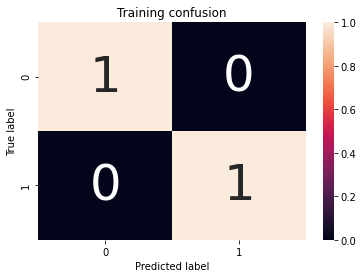

In [4]:
import pcapkit
import os
import graphviz 
from pcapkit.utilities.validations import pkt_check 
from scapy.all import *
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

# Loading the data
raw_data = pd.read_csv('C:\\Users\\andre\\Disso\\Disso\\training_data.csv', encoding='latin-1')
#prints no. of rows by no. of columns
print(raw_data.shape)
#prints first 5 lines of folder
#print(raw_data.head())

#g = sns.pairplot(raw_data2, hue = 'Exited', diag_kws={'bw': 0.2})

# Limiting the data
limited_data = raw_data[['Count', 'Total_Bytes_Sent','SYN Flood', 'HTTP_GET_Req', 'Malicious']]

X = limited_data.drop('Malicious', axis=1).values# Input features (attributes)
y = limited_data['Malicious'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    #Plots a confusion matrix
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')   


